In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
# Import the requests library.
import requests
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+ weather_api_key


In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | yeppoon
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | smirnykh
Processing Record 12 of Set 1 | broken hill
Processing Record 13 of Set 1 | bandarbeyla
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | xining
Processing Record 16 of Set 1 | clyde river
Processing Record 17 of Set 1 | nemuro
Processing Record 18 of Set 1 | vestbygda
City not found. Skipping...
Processing Record 19 of Set 1 | lompoc
Processing Record 20 of Set 1 | victoria
Proce

Processing Record 40 of Set 4 | maniitsoq
Processing Record 41 of Set 4 | baghdad
Processing Record 42 of Set 4 | ilulissat
Processing Record 43 of Set 4 | chicama
Processing Record 44 of Set 4 | alanya
Processing Record 45 of Set 4 | haicheng
Processing Record 46 of Set 4 | la ronge
Processing Record 47 of Set 4 | derazhnya
Processing Record 48 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 49 of Set 4 | sidi ali
Processing Record 50 of Set 4 | delijan
Processing Record 1 of Set 5 | flinders
Processing Record 2 of Set 5 | qaqortoq
Processing Record 3 of Set 5 | flin flon
Processing Record 4 of Set 5 | batemans bay
Processing Record 5 of Set 5 | saint-philippe
Processing Record 6 of Set 5 | nador
Processing Record 7 of Set 5 | bilibino
Processing Record 8 of Set 5 | katherine
Processing Record 9 of Set 5 | hasaki
Processing Record 10 of Set 5 | chengde
Processing Record 11 of Set 5 | saryozek
Processing Record 12 of Set 5 | the valley
Processing Record 13 of Set

Processing Record 28 of Set 8 | beruwala
Processing Record 29 of Set 8 | manhumirim
Processing Record 30 of Set 8 | ye
City not found. Skipping...
Processing Record 31 of Set 8 | pankrushikha
Processing Record 32 of Set 8 | dwarka
Processing Record 33 of Set 8 | kuala terengganu
Processing Record 34 of Set 8 | abu samrah
Processing Record 35 of Set 8 | carutapera
Processing Record 36 of Set 8 | santarem
Processing Record 37 of Set 8 | shu
Processing Record 38 of Set 8 | koungheul
Processing Record 39 of Set 8 | acapulco
Processing Record 40 of Set 8 | kyaiklat
Processing Record 41 of Set 8 | kieta
Processing Record 42 of Set 8 | tallahassee
Processing Record 43 of Set 8 | yumen
Processing Record 44 of Set 8 | fengrun
Processing Record 45 of Set 8 | male
Processing Record 46 of Set 8 | rio grande
Processing Record 47 of Set 8 | igarka
Processing Record 48 of Set 8 | hastings
Processing Record 49 of Set 8 | parit buntar
Processing Record 50 of Set 8 | carnarvon
Processing Record 1 of Set

Processing Record 12 of Set 12 | lobanovo
Processing Record 13 of Set 12 | san andres
Processing Record 14 of Set 12 | antsohihy
Processing Record 15 of Set 12 | santa marta
Processing Record 16 of Set 12 | pavlivka
Processing Record 17 of Set 12 | hamilton
Processing Record 18 of Set 12 | kathmandu
Processing Record 19 of Set 12 | bloomingdale
Processing Record 20 of Set 12 | henties bay
Processing Record 21 of Set 12 | nioki
Processing Record 22 of Set 12 | khadyzhensk
Processing Record 23 of Set 12 | tondano
Processing Record 24 of Set 12 | samusu
City not found. Skipping...
Processing Record 25 of Set 12 | luorong
Processing Record 26 of Set 12 | raudeberg
Processing Record 27 of Set 12 | yekaterinovka
Processing Record 28 of Set 12 | tezu
Processing Record 29 of Set 12 | outlook
Processing Record 30 of Set 12 | prado
Processing Record 31 of Set 12 | beira
Processing Record 32 of Set 12 | izyum
Processing Record 33 of Set 12 | luyang
Processing Record 34 of Set 12 | quixeramobim
Pr

In [12]:
len(city_data)

563

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahebourg,-20.4081,57.7000,77.25,94,40,5.75,MU,2022-04-20 20:15:49
1,Yeppoon,-23.1333,150.7333,71.38,86,84,9.86,AU,2022-04-20 20:15:49
2,Barrow,71.2906,-156.7887,3.22,78,0,10.36,US,2022-04-20 20:15:41
3,Avarua,-21.2078,-159.7750,77.05,69,75,14.97,CK,2022-04-20 20:15:50
4,Hermanus,-34.4187,19.2345,63.36,83,100,2.06,ZA,2022-04-20 20:15:51
5,Rikitea,-23.1203,-134.9692,78.57,72,2,19.04,PF,2022-04-20 20:15:49
6,Yellowknife,62.4560,-114.3525,32.52,29,20,8.01,CA,2022-04-20 20:15:52
7,Smirnykh,49.7500,142.8333,37.60,90,81,1.34,RU,2022-04-20 20:15:54
8,Broken Hill,-31.9500,141.4333,59.76,66,100,8.70,AU,2022-04-20 20:15:54
9,Bandarbeyla,9.4942,50.8122,81.09,72,5,8.23,SO,2022-04-20 20:15:55


In [14]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp',
                    'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahebourg,MU,2022-04-20 20:15:49,-20.4081,57.7000,77.25,94,40,5.75
1,Yeppoon,AU,2022-04-20 20:15:49,-23.1333,150.7333,71.38,86,84,9.86
2,Barrow,US,2022-04-20 20:15:41,71.2906,-156.7887,3.22,78,0,10.36
3,Avarua,CK,2022-04-20 20:15:50,-21.2078,-159.7750,77.05,69,75,14.97
4,Hermanus,ZA,2022-04-20 20:15:51,-34.4187,19.2345,63.36,83,100,2.06
5,Rikitea,PF,2022-04-20 20:15:49,-23.1203,-134.9692,78.57,72,2,19.04
6,Yellowknife,CA,2022-04-20 20:15:52,62.4560,-114.3525,32.52,29,20,8.01
7,Smirnykh,RU,2022-04-20 20:15:54,49.7500,142.8333,37.60,90,81,1.34
8,Broken Hill,AU,2022-04-20 20:15:54,-31.9500,141.4333,59.76,66,100,8.70
9,Bandarbeyla,SO,2022-04-20 20:15:55,9.4942,50.8122,81.09,72,5,8.23


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

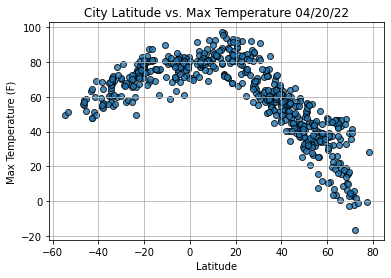

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

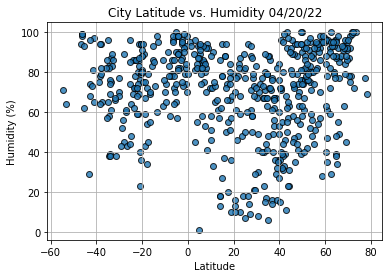

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

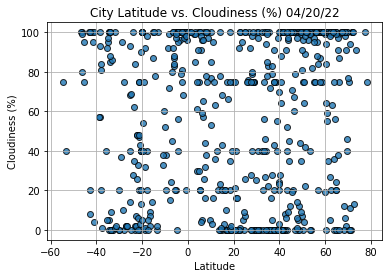

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

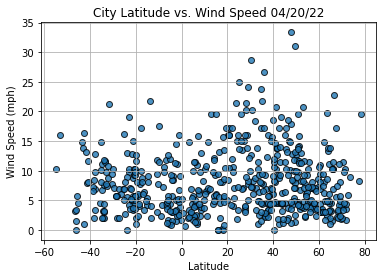

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, xytext = text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

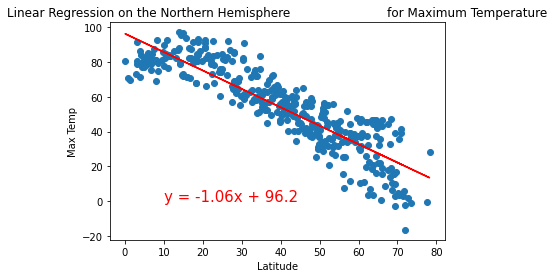

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,0))

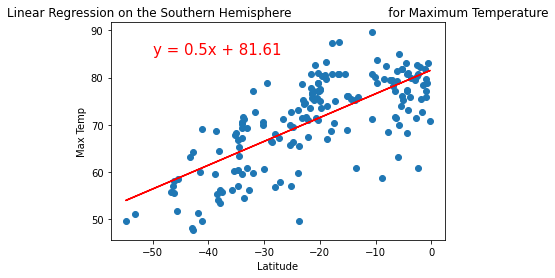

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

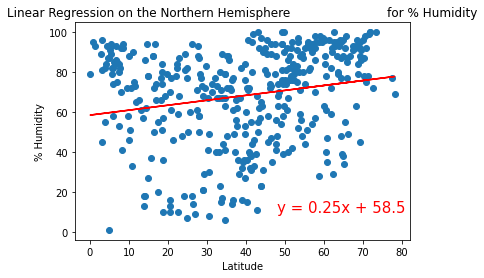

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(48,10))

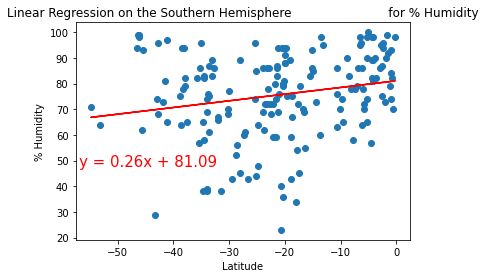

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-57,48))

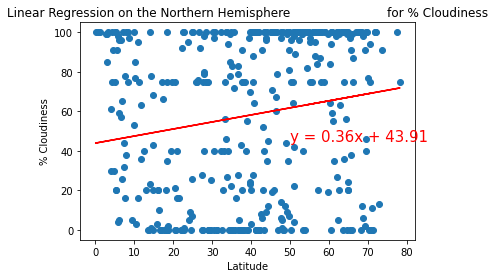

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50, 45))

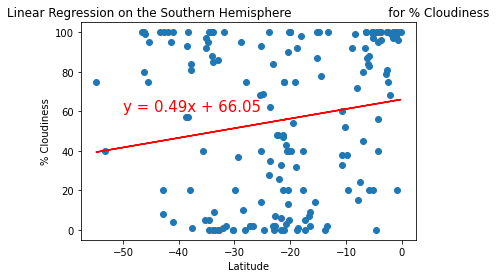

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

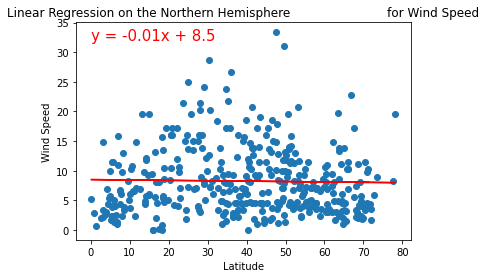

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,32))

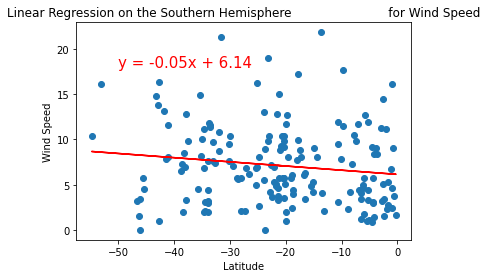

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,18))